<a href="https://colab.research.google.com/github/roggersanguzu/Machine-Learning/blob/main/Decision_Tree_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
iris_dataset=load_iris()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
X_train,X_test,y_train,y_test=train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)

from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [6]:
print("Training set Accuracy",tree.score(X_train,y_train))
print("Testing Set Accuracy",tree.score(X_test,y_test))

Training set Accuracy 1.0
Testing Set Accuracy 0.9736842105263158


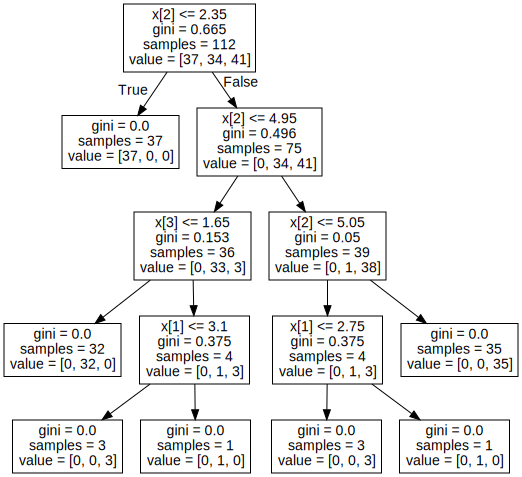

In [13]:
!pip install graphviz

from sklearn.tree import export_graphviz
export_graphviz(tree,out_file='tree.dot')

import graphviz
with open('tree.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)